# Comparing C1D output from g37_g37 to 1D_1D at (359.2 E, 83.1 N)

In [1]:
from netCDF4 import Dataset                     # For reading data
from matplotlib import pyplot as plt            # For plotting
# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0) # Large figures

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load data
# (102,40) is North Pole (359.2 E, 83.1 N)
lat_in = 102
lon_in = 40
case1  = 'C1D.g37_g37.southern_ocean'
case2  = 'C1D.ArcticOcean'
suffix = 'pop.h.nday1.0001-01-02-03456.nc'
file1  = '/Users/mlevy/scratch/cesm-out/'+case1+'/run/'+case1+'.'+suffix
file2  = '/Users/mlevy/scratch/cesm-out/'+case2+'/run/'+case2+'.'+suffix
data1  = Dataset(file1)
time   = data1.variables['time'][:]
HMXL1  = data1.variables['HMXL_2'][:,lat_in,lon_in]
SST1   = data1.variables['SST'][:,lat_in,lon_in]
data2  = Dataset(file2)
HMXL2  = data2.variables['HMXL_2'][:,0,0]
SST2   = data2.variables['SST'][:,0,0]

suffix   = 'pop.h.0001-01-02-03456.nc'
file3    = '/Users/mlevy/scratch/cesm-out/'+case1+'/run/'+case1+'.'+suffix
file4    = '/Users/mlevy/scratch/cesm-out/'+case2+'/run/'+case2+'.'+suffix
data3    = Dataset(file3)
time2    = data3.variables['time'][:]
SHF_QSW1 = data3.variables['SHF_QSW'][:,lat_in,lon_in]
LWDN_F1  = data3.variables['LWDN_F'][:,lat_in,lon_in]
data4    = Dataset(file4)
SHF_QSW2 = data4.variables['SHF_QSW'][:,0,0]
LWDN_F2  = data4.variables['LWDN_F'][:,0,0]

In [ ]:
print(max(abs(SHF_QSW1-SHF_QSW2)))
print(abs(SHF_QSW1-SHF_QSW2))
print(abs(LWDN_F1-LWDN_F2)/LWDN_F1)
print(max(abs(LWDN_F1-LWDN_F2)))

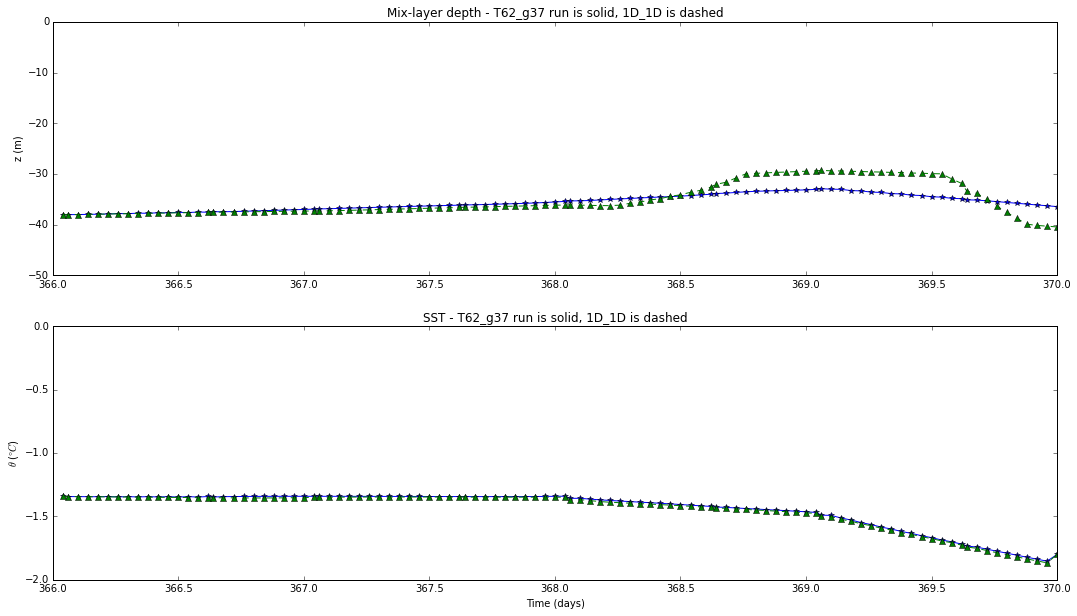

In [3]:
plt.subplot(2,1,1); plt.plot(time, -HMXL1/100,'-*', time, -HMXL2/100, '--^'); plt.ylim((-50,0))
plt.ylabel('z (m)'); plt.title('Mix-layer depth - T62_g37 run is solid, 1D_1D is dashed')
plt.subplot(2,1,2); plt.plot(time, SST1,'-*', time, SST2, '--^'); plt.ylim((-2,0))
plt.xlabel('Time (days)'); plt.ylabel(r'$\theta$ (${\degree}C$)')
plt.title('SST - T62_g37 run is solid, 1D_1D is dashed');

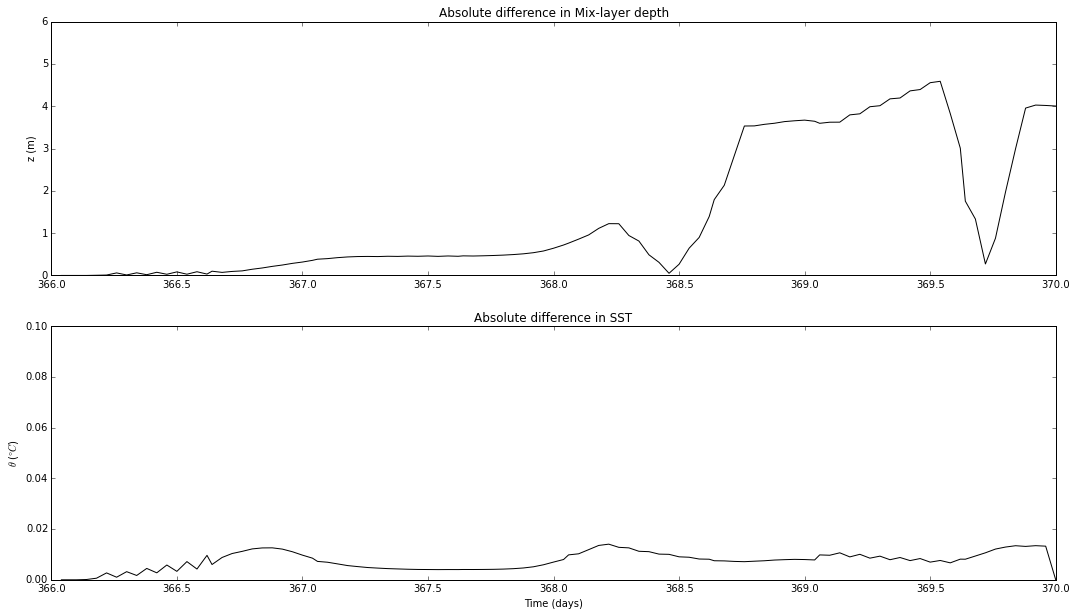

In [4]:
plt.subplot(2,1,1); plt.plot(time, abs(HMXL1-HMXL2)/100,'-k'); plt.ylim((0,6))
plt.ylabel('z (m)'); plt.title('Absolute difference in Mix-layer depth')
plt.subplot(2,1,2); plt.plot(time, abs(SST1-SST2),'-k'); plt.ylim((0,0.1))
plt.xlabel('Time (days)'); plt.ylabel(r'$\theta$ (${\degree}C$)')
plt.title('Absolute difference in SST');

In [5]:
print max(abs(HMXL1-HMXL2)), "(", 100*max(abs(HMXL1-HMXL2))/max(abs(HMXL1)), " % )"
print max(abs(SST1-SST2)), "(", 100*max(abs(SST1-SST2))/max(abs(SST1)), "% )"

459.248 ( 12.0805487226  % )
0.014053 ( 0.758367029957 % )
